In [1]:
import pandas as pd 
import sklearn
import seaborn as sea
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import warnings
warnings.filterwarnings('ignore')

## Load in the data

In [2]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
house_prices_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
house_prices_train.shape, house_prices_test.shape

((1460, 81), (1459, 80))

## Ridge Regression 

In [4]:
train = pd.read_csv('train_2ndpoly.csv')
test = pd.read_csv('test_2ndpoly.csv')
output = pd.read_csv('log_SalePrice.csv', header=None)
output.rename(columns={0: "log_SalePrice"}, inplace=True)
output.head(2)
print train.shape, test.shape, output.shape

(1460, 352) (1459, 352) (1460, 1)


In [5]:
output.head(2)

,log_SalePrice
0,12.247699
1,12.109016


In [6]:
pd.options.display.max_columns = 999
train.head(5)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,Age,Remodel_Age,LastSale_Age,LotArea**2,LotArea * OverallQual,LotArea * OverallCond,LotArea * TotalBsmtSF,LotArea * 1stFlrSF,LotArea * 2ndFlrSF,LotArea * GrLivArea,LotArea * BsmtFullBath,LotArea * FullBath,LotArea * HalfBath,LotArea * BedroomAbvGr,LotArea * TotRmsAbvGrd,LotArea * GarageCars,LotArea * GarageArea,LotArea * Age,LotArea * Remodel_Age,LotArea * LastSale_Age,OverallQual**2,OverallQual * OverallCond,OverallQual * TotalBsmtSF,OverallQual * 1stFlrSF,OverallQual * 2ndFlrSF,OverallQual * GrLivArea,OverallQual * BsmtFullBath,OverallQual * FullBath,OverallQual * HalfBath,OverallQual * BedroomAbvGr,OverallQual * TotRmsAbvGrd,OverallQual * GarageCars,OverallQual * GarageArea,OverallQual * Age,OverallQual * Remodel_Age,OverallQual * LastSale_Age,OverallCond**2,OverallCond * TotalBsmtSF,OverallCond * 1stFlrSF,OverallCond * 2ndFlrSF,OverallCond * GrLivArea,OverallCond * BsmtFullBath,OverallCond * FullBath,OverallCond * HalfBath,OverallCond * BedroomAbvGr,OverallCond * TotRmsAbvGrd,OverallCond * GarageCars,OverallCond * GarageArea,OverallCond * Age,OverallCond * Remodel_Age,OverallCond * LastSale_Age,TotalBsmtSF**2,TotalBsmtSF * 1stFlrSF,TotalBsmtSF * 2ndFlrSF,TotalBsmtSF * GrLivArea,TotalBsmtSF * BsmtFullBath,TotalBsmtSF * FullBath,TotalBsmtSF * HalfBath,TotalBsmtSF * BedroomAbvGr,TotalBsmtSF * TotRmsAbvGrd,TotalBsmtSF * GarageCars,TotalBsmtSF * GarageArea,TotalBsmtSF * Age,TotalBsmtSF * Remodel_Age,TotalBsmtSF * LastSale_Age,1stFlrSF**2,1stFlrSF * 2ndFlrSF,1stFlrSF * GrLivArea,1stFlrSF * BsmtFullBath,1stFlrSF * FullBath,1stFlrSF * HalfBath,1stFlrSF * BedroomAbvGr,1stFlrSF * TotRmsAbvGrd,1stFlrSF * GarageCars,1stFlrSF * GarageArea,1stFlrSF * Age,1stFlrSF * Remodel_Age,1stFlrSF * LastSale_Age,2ndFlrSF**2,2ndFlrSF * GrLivArea,2ndFlrSF * BsmtFullBath,2ndFlrSF * FullBath,2ndFlrSF * HalfBath,2ndFlrSF * BedroomAbvGr,2ndFlrSF * TotRmsAbvGrd,2ndFlrSF * GarageCars,2ndFlrSF * GarageArea,2ndFlrSF * Age,2ndFlrSF * Remodel_Age,2ndFlrSF * LastSale_Age,GrLivArea**2,GrLivArea * BsmtFullBath,GrLivArea * FullBath,GrLivArea * HalfBath,GrLivArea * BedroomAbvGr,GrLivArea * TotRmsAbvGrd,GrLivArea * GarageCars,GrLivArea * GarageArea,GrLivArea * Age,GrLivArea * Remodel_Age,GrLivArea * LastSale_Age,BsmtFullBath**2,BsmtFullBath * FullBath,BsmtFullBath * HalfBath,BsmtFullBath * BedroomAbvGr,BsmtFullBath * TotRmsAbvGrd,BsmtFullBath * GarageCars,BsmtFullBath * GarageArea,BsmtFullBath * Age,BsmtFullBath * Remodel_Age,BsmtFullBath * LastSale_Age,FullBath**2,FullBath * HalfBath,FullBath * BedroomAbvGr,FullBath * TotRmsAbvGrd,FullBath * GarageCars,FullBath * GarageArea,FullBath * Age,FullBath * Remodel_Age,FullBath * LastSale_Age,HalfBath**2,HalfBath * BedroomAbvGr,HalfBath * TotRmsAbvGrd,HalfBath * GarageCars,HalfBath * GarageArea,HalfBath * Age,HalfBath * Remodel_Age,HalfBath * LastSale_Age,BedroomAbvGr**2,BedroomAbvGr * TotRmsAbvGrd,BedroomAbvGr * GarageCars,BedroomAbvGr * GarageArea,BedroomAbvGr * Age,BedroomAbvGr * Remodel_Age,BedroomAbvGr * LastSale_Age,TotRmsAbvGrd**2,TotRmsAbvGrd * GarageCars,TotRmsAbvGrd * GarageArea,TotRmsAbvGrd * Age,TotRmsAbvGrd * Remodel_Age,TotRmsAbvGrd * LastSale_Age,GarageCars**2,GarageCars * GarageArea,GarageCars * Age,GarageCars * Remodel_Age,GarageCars * LastSale_Age,GarageArea**2,GarageArea * Age,GarageArea * Remodel_Age,GarageArea * LastSale_Age,Age**2,Age * Remodel_Age,Age * LastSale_Age,Remodel_Age**2,Remodel_Age * LastSale_Age,LastSale_Age**2,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neigh

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, output, test_size=0.2, random_state=37)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 352), (292, 352), (1168, 1), (292, 1))

In [8]:
alpha = np.arange(0.01,20,0.05)
print alpha

[  1.00000000e-02   6.00000000e-02   1.10000000e-01   1.60000000e-01
   2.10000000e-01   2.60000000e-01   3.10000000e-01   3.60000000e-01
   4.10000000e-01   4.60000000e-01   5.10000000e-01   5.60000000e-01
   6.10000000e-01   6.60000000e-01   7.10000000e-01   7.60000000e-01
   8.10000000e-01   8.60000000e-01   9.10000000e-01   9.60000000e-01
   1.01000000e+00   1.06000000e+00   1.11000000e+00   1.16000000e+00
   1.21000000e+00   1.26000000e+00   1.31000000e+00   1.36000000e+00
   1.41000000e+00   1.46000000e+00   1.51000000e+00   1.56000000e+00
   1.61000000e+00   1.66000000e+00   1.71000000e+00   1.76000000e+00
   1.81000000e+00   1.86000000e+00   1.91000000e+00   1.96000000e+00
   2.01000000e+00   2.06000000e+00   2.11000000e+00   2.16000000e+00
   2.21000000e+00   2.26000000e+00   2.31000000e+00   2.36000000e+00
   2.41000000e+00   2.46000000e+00   2.51000000e+00   2.56000000e+00
   2.61000000e+00   2.66000000e+00   2.71000000e+00   2.76000000e+00
   2.81000000e+00   2.86000000e+00

In [9]:
def modelfit(model, dtrain, features, output, validation, validation_output, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model.fit(dtrain[features], output)
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[features])
    validation_predictions = model.predict(validation[features])

    
    #Perform cross-validation:
    from sklearn import cross_validation
    from sklearn import metrics
    if performCV:
        cv_score = cross_validation.cross_val_score(model, dtrain[features], output, cv=cv_folds)
    
    #Print model report:
    print "\nModel Report"
    print "Training R-Square: %.3f" % metrics.r2_score(output, dtrain_predictions)
    print "Training RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(output, dtrain_predictions))    
    print "Validation R-Square: %.3f" % metrics.r2_score(validation_output, validation_predictions)
    print "Validation RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(validation_output, validation_predictions))
    print('Variance score: %.2f' % model.score(validation, validation_output))
    print('Optimal Alpha: %.4f') %model.alpha_
    
    if performCV:
        print"Training cv_score: "
        print(cv_score)
        print "CV Score : Mean: %.7g | Std: %.7g | Min: %.7g | Max: %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    if printFeatureImportance:
        df = {'features': features.values, 'Coefficients': model.coef_[0]}
        coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
        plt.figure()
        coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
        plt.ylabel('Feature Coefs')
        plt.figure()
        coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
        plt.ylabel('Feature Coefs')

In [10]:
from sklearn import linear_model
ridge = linear_model.RidgeCV(alphas=alpha, fit_intercept=True)


Model Report
Training R-Square: 0.945
Training RMSE : 0.094
Validation R-Square: 0.854
Validation RMSE : 0.145
Variance score: 0.85
Optimal Alpha: 18.3100
Training cv_score: 
[ 0.80899386  0.91224326  0.90785079  0.8918719   0.91512869]
CV Score : Mean: 0.8872177 | Std: 0.03992908 | Min: 0.8089939 | Max: 0.9151287


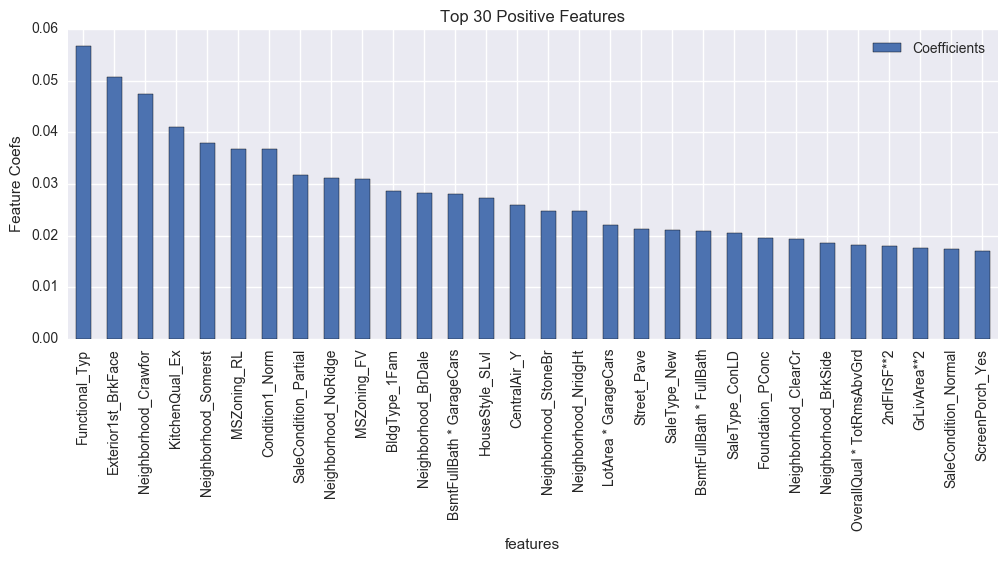

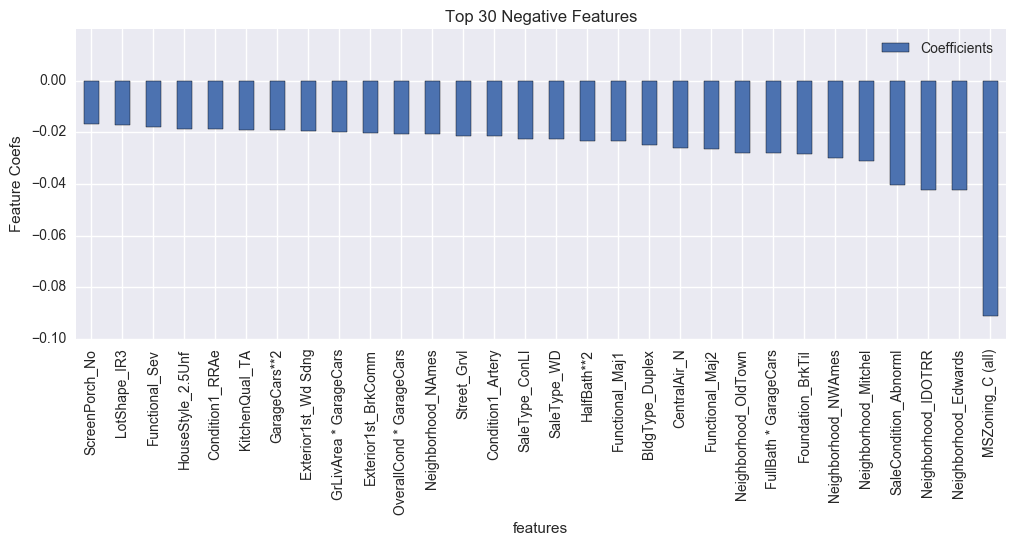

In [11]:
features = X_train.columns
modelfit(ridge, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=True)

In [12]:
# The coefficients
pd.options.display.max_rows = 999
df = {'features': features.values, 'Coefficients': ridge.coef_[0]}
ridge_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
ridge_coefficients

,Coefficients,features
317,5.677604e-02,Functional_Typ
257,5.063949e-02,Exterior1st_BrkFace
199,4.738063e-02,Neighborhood_Crawfor
307,4.098452e-02,KitchenQual_Ex
214,3.790179e-02,Neighborhood_Somerst
173,3.681477e-02,MSZoning_RL
220,3.675115e-02,Condition1_Norm
349,3.176859e-02,SaleCondition_Partial
208,3.118148e-02,Neighborhood_NoRidge
171,3.102078e-02,MSZoning_FV


### Predict and submit to kaggle

In [13]:
ridge_prediction = np.expm1(ridge.predict(test))
ridge_prediction[:,0]

array([ 122269.79064617,  159790.78645374,  190467.44970159, ...,
        155997.96849766,  110436.37875644,  232534.17231266])

In [14]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': ridge_prediction[:,0]})
df.head(5)

,Id,SalePrice
0,1461,122269.790646
1,1462,159790.786454
2,1463,190467.449702
3,1464,196833.372789
4,1465,178919.782296


In [37]:
#df.to_csv('kaggle_submission_ridge_12232016.csv', index=False)

This performed worse than the original ridge regression on kaggle's leadership board! :(

## Lasso Regression

In [15]:
alpha = np.arange(0.0001,0.0009,0.00001)
print alpha

[ 0.0001   0.00011  0.00012  0.00013  0.00014  0.00015  0.00016  0.00017
  0.00018  0.00019  0.0002   0.00021  0.00022  0.00023  0.00024  0.00025
  0.00026  0.00027  0.00028  0.00029  0.0003   0.00031  0.00032  0.00033
  0.00034  0.00035  0.00036  0.00037  0.00038  0.00039  0.0004   0.00041
  0.00042  0.00043  0.00044  0.00045  0.00046  0.00047  0.00048  0.00049
  0.0005   0.00051  0.00052  0.00053  0.00054  0.00055  0.00056  0.00057
  0.00058  0.00059  0.0006   0.00061  0.00062  0.00063  0.00064  0.00065
  0.00066  0.00067  0.00068  0.00069  0.0007   0.00071  0.00072  0.00073
  0.00074  0.00075  0.00076  0.00077  0.00078  0.00079  0.0008   0.00081
  0.00082  0.00083  0.00084  0.00085  0.00086  0.00087  0.00088  0.00089]


In [16]:
lasso = linear_model.LassoCV(fit_intercept=True, alphas=alpha)

In [17]:
features = X_train.columns
modelfit(lasso, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=False)


Model Report
Training R-Square: 0.938
Training RMSE : 0.101
Validation R-Square: 0.850
Validation RMSE : 0.147
Variance score: 0.85
Optimal Alpha: 0.0009
Training cv_score: 
[ 0.82510063  0.90565303  0.91462643  0.89825688  0.91020084]
CV Score : Mean: 0.8907676 | Std: 0.03327675 | Min: 0.8251006 | Max: 0.9146264


In [18]:
# The coefficients
pd.options.display.max_rows = 999
df = {'features': features.values, 'Coefficients': lasso.coef_}
lasso_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
lasso_coefficients

,Coefficients,features
317,6.281823e-02,Functional_Typ
199,5.785257e-02,Neighborhood_Crawfor
257,5.628811e-02,Exterior1st_BrkFace
220,5.051322e-02,Condition1_Norm
307,4.615842e-02,KitchenQual_Ex
214,4.382344e-02,Neighborhood_Somerst
349,4.294284e-02,SaleCondition_Partial
120,3.506890e-02,BsmtFullBath * GarageCars
235,2.757921e-02,BldgType_1Fam
104,2.075298e-02,GrLivArea**2


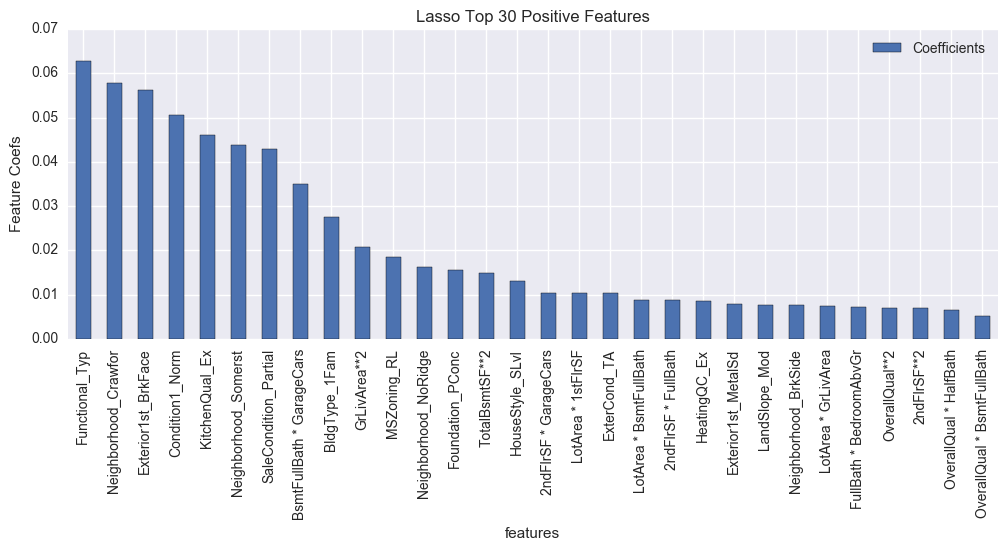

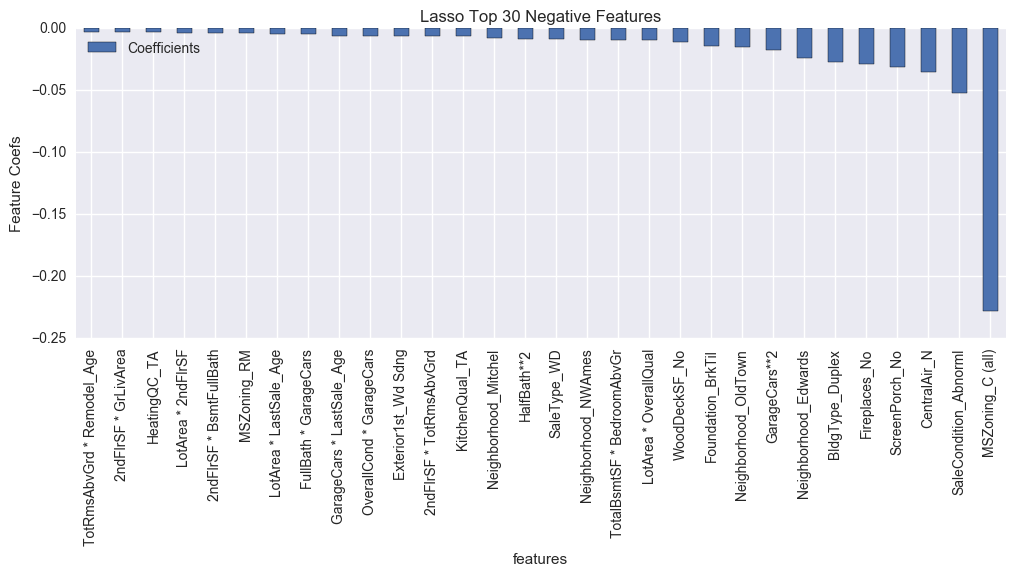

In [19]:
plt.figure()
lasso_coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Lasso Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
lasso_coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Lasso Top 30 Negative Features')
plt.ylabel('Feature Coefs')

In [20]:
lasso_prediction = np.expm1(lasso.predict(test))
lasso_prediction

array([ 118642.13371143,  157703.81637673,  189923.98337264, ...,
        158726.97390798,  112821.21979653,  234830.72873795])

In [21]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': lasso_prediction})
df.head(5)

,Id,SalePrice
0,1461,118642.133711
1,1462,157703.816377
2,1463,189923.983373
3,1464,195421.384546
4,1465,180748.617890


In [22]:
#df.to_csv('kaggle_submission_lasso_12232016.csv', index=False)

In [23]:
ridge_lasso_prediction = np.expm1(0.5 * lasso.predict(test) + 0.5 * ridge.predict(test)[:,0])
ridge_lasso_prediction

array([ 120442.30518396,  158743.87185794,  190195.52242506, ...,
        157356.55527259,  111622.43042486,  233679.62929254])

In [24]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': ridge_lasso_prediction})
df.head(5)

,Id,SalePrice
0,1461,120442.305184
1,1462,158743.871858
2,1463,190195.522425
3,1464,196126.107997
4,1465,179831.875283


In [25]:
#df.to_csv('kaggle_submission_ridge_lasso_12232016.csv', index=False)